
### Information du binôme
Étudiante 1 : Hoang Thuy Duong VU | 21110221

Étudiante 2 : Halimatou DIALLO | 21114613

### Préliminaire 
Ce projet est réalisé dans le cadre de l'UE Algorithmique II - 3IN003, proposé par Sorbonne Université, Licence Informatique, qui contribue à $15%$ de la note finale. 

Lors de la réalisation du projet, nous souhaitons exprimer nos sincères remerciements à M. Manuel AMOUSSOU, notre professeur en TD, pour nous avoir fourni suffisamment de connaissances concernant de différents méthodes algorithmiques, la programmation dynamiques, etc. afin d'optimiser au maximum la complexité des programmes; à notre ami Alexis VU pour nous avoir aider à mieux comprendre le moteur du jeu; et à aux responsables de l'UE Algorithmique II. 

#### À noter que les codes du projet sont construits manuellement, sans l'aide de ChatGPT.

### Règle du jeu
Considérons une grille de $N$ lignes numérotées de $0$ à $N-1$ et $M$ colonnes numérotées de $0$ à $M-1$. Chacune des $N\times M$ cases doit être coloriée en blanche ou en noire. 

À chaque ligne $l_i, \, 0,\,...N-1$, est associée une séquence d'entiers représentant les longueurs des blocs de cases noires de la ligne. De même, à chaque colonne $c_j, \, j=0,\,...M-1$, est associée une séquence d'entiers représentant les longueurs des blocs de cases noires de la colonne. 

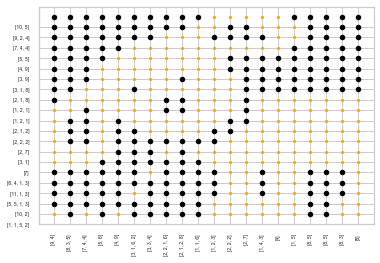

In [1]:
# Implémentation des librairies nécessaires
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pydot

# Implémentation de code source
import src

# FICHIER No.13 - Mona Lisa
list_line, list_col = src.read_file("instances/ouaf.txt")
A = [[-1]*(len(list_col))]*(len(list_line))
src.show(A, list_line, list_col, width=15, length=12, textsize0=5, textsize1=20, labelsize=5)

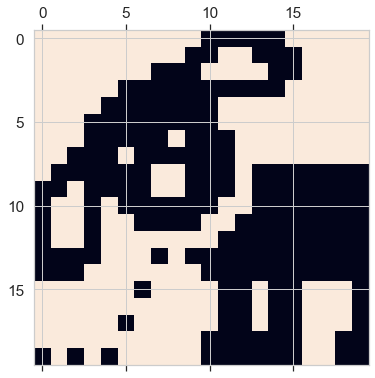

In [5]:
list_line, list_col = src.read_file("instances/ouaf.txt")
A = [[-1]*(len(list_col))]*(len(list_line))
_, A = src.COLORATION(A, list_line, list_col)
src.nonogramStyle(A)

## 1 Méthode incomplète 
### 1.1 Première étape
Supposons que $T(j,l)\,\,(j=0,...M-1, l=1,...k)$ comme vrai s'il est possible de colorier les $j+1$ premières cases $(i,0),\,(i,1),\,...(i,j)$ de la ligne $l_i$ avec la sous-séquence $(s_1,...s_l)$ des $l$ premiers blocs de la ligne $l_i$. 

Si on a calculé tous les $T(j,l)$, pour savoir s'il est possible de colorier la ligne $l_i$ entière avec la séquence entière, il faut bien vérifier les conditions suivantes : 
1. Si la ligne $l_i$ est entièrement coloriée, il faut que les longueurs des blocs noirs soient strictement correspondant à la séquence $(s_1, ...s_k)$ associée de gauche à droite. 
2. Il faut que les deux bouts de chaque bloc noir de la ligne $l_i$ soient entourés par au moins deux cases blancs, soit un case à côté de chacun des bouts.

#### Algorithme de vérification de conformité et coloration $T(j,l)$


```python
T(j,l)
Entrée : 
  L : la ligne l_i à colorier
  s : la séquence des blocs noires à respecter
  j : les j+1 premiers cases de la ligne l_i avec la sous-séquence s_1,...s_l
  l : indice active de la séquence s des blocs

Sortie : retourne Vrai s'il est possible de colorier les j+1 premiers cases de la ligne l_i avec la sous-séquence s_1,...s_l, ou Faux sinon

(BASE) Si l=0 (pas de bloc), j dans {0,...M-1}
  Pour i de 0 à j+1 faire : 
    Si L[i] = 1 : retourne Faux     # vérifier s'il existe une case noire tandis qu'il n'y a aucun bloc à colorier
  Fin pour
  Pour i de 0 à j+1 faire : 
    Si L[i] = -1 : L[i] <- 0        # colorier la case en blanche si elle n'est pas encore coloriée
  Fin pour
  Retourne Vrai
Fin si

(2a) Si j < s_l - 1 : 
  Retourne Faux                     # pas suffisamment de case à colorier
Fin Si

(2b) Si j = s_l - 1 : 
  Si l = 1 : 
    Pour i de 0 à j+1 faire : 
      Si l[i] = 0 : Retourne Faux   # s'il existe une case blanche au milieu de celles en noires
    Fin pour
    Pour i de 0 à j+1 faire : 
      Si L[i] = -1 : L[i] <- 1      # colorier la case en noire si elle n'est pas encore coloriée
    Fin pour
    Retourne Vrai
  Fin si 
  Sinon : 
    Retourne Faux                   # impossible de colorer deux blocs dans ces j+1 cases
  Fin sinon

(2c) Sinon : 
  Si L[j] = 0 :                     # si L[j] est noire
    Retourne T(j-1,l)
  Fin si
  Si L[j] = 1 : 
    Si L[j - s_l] = 1 :             # si la case au bout gauche de ce bloc est encore noire
      Retourne Faux
    Fin si 

    Pour i de j - s_l + 1 à j : 
      Si L[i] = 0 : Retourne Faux  # s'il existe une case blanche au milieu de celles en noires
      Fin si 
    Fin pour

    Si L[j - s_l] = -1 :            # si la première n'est pas encore coloriée
      L[j - s_l] <- 0
    Fin si 

    Pour i de j - s_l + 1 à j : 
      Si L[i] = -1 : 
        L[i] <- 1
      Fin si 
    Fin pour
    Retourne T(j-s_l-1, l-1)

    Sinon (*) :                     # explication spéciale ci-dessous
      h0 <- L[0...j] + [0]          
      h1 <- L[0...j] + [1]
      P <- T(j,l | h0)
      Q <- T(j,l | h1)
      Si tout est faux : Retourne Faux
      Si Q faux : 
        Pour i de 0 à j+1 : 
          Si L[i] != h0[i] : L[i] <- h0[i]
        Fin pour 
      Fin si 
      Si P faux
        Pour i de 0 à j+1 : 
          Si L[i] != h1[i] : L[i] <- h1[i]
        Fin pour
      Fin si 
      Sinon : 
        Pour i de 0 à j :
          Si h0[i] = h1[i] et L[i] != h0[i] : 
            L[i] <- h0[i]
          Fin si 
        Fin pour
      Fin sinon
      Retourne Vrai
```

In [2]:
# Veuillez exécuter le bloc code ci-dessous afin de tester T(j,l)
L = [-1,-1,-1,1,1,-1,1,0,0,1,-1,0,0,0,1,-1,-1,-1,-1,1,-1,0]
bloc = [4, 2, 3, 3]
j = 21
l = 4
print("Avant T(j,l) : L =",L)
print("====================")
print("DÉTECTION : Le coloriage est possible." if src.coloring_chain(L, bloc, j, l) else "DÉTECTION : Le coloriage n'est pas possible.")
print("====================")
print("Après T(j,l) : L =",L)

Avant T(j,l) : L = [-1, -1, -1, 1, 1, -1, 1, 0, 0, 1, -1, 0, 0, 0, 1, -1, -1, -1, -1, 1, -1, 0]
DÉTECTION : Le coloriage est possible.
Après T(j,l) : L = [0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0]


### 1.2 Généralisation
En modifiant chacun des cas de l'algorithme $T(j,l)$ définie précédemmemt, et en l'appliquant à la fonction `coloring_chain`, la fonction est donc maintenant capable de colorier un nombre de cases d'un ligne $l_i$ avec sa séquence correspondante. 

En analysant l'algorithme construite, on a : 
#### Cas 2b
Si $j = s_l-1 = s_1-1$, le cas où la longueur du premier bloc est égale aux $j+1$ premières cases de la ligne $l_i$, on va vérifier s'il existe une case blanche parmi ces $j+1$ cases. 
- S'il existe, la coloration est forcément pas conforme à la séquence $s$ associée. 
- Sinon, le test est valide et il est possible de colorier tous les cases vides dans cette zone en noirs

#### Cas 2c
Si $j > s_l-1$, le cas où la longuer du premier bloc est strictement supérieur aux $j+1$ premières cases de la ligne $l_i$. 

Si la case $j$ est coloriée en noire, on fait l'appel récursive **dynamique** à $T(j-1,l)$.

En revanche, si elle est noire, et que les tests de conformité sont réussis, on colore la case au bout gauche du bloc en blanche si elle est encore vide, et colore les cases de $j-s_l+1$ à $j$ en noire, avant de faire l'appel récursive **dynamique** à $T(j-s_l-1, l-1)$.

Et dans le dernier cas où la case $j$ reste vide, on construit un hypothèse $H_0$ tel que blanc est la couleur appropriée, et un contre-hypothèse $H_1$ qui suggère que noire sera la bonne coloration pour cette case. 
    
On effectue ensuite les tests de conformité et les stocke respectivement dans deux variables $P = T(j,l | H_0)$ et $Q = T(j,l | H_1)$ suivant le principe de **Diviser pour régner**. Il existe donc trois cas, soit tous les deux sont faux *(on n'arrive donc pas encore à une solution de coloriage)*, soit une entre eux est vrai, et soit tous les deux sont vrais. 
- Si tous sont faux, on retourne tout de suite `False`, vu qu'il n'existe aucune solution pour colorer la ligne $l_i$ et on rejete tous les deux hypothèses supposés. 
- Si un entre est vrai : 
    - Si $P$ a réussi, on garde $H_0$ et fusionne la ligne actuelle avec sa nouvelle version partiellement coloriée en blanc. 
    - De la même manière, en revanche, si $Q$ a réussi, on garde donc $H_1$ et poursuit les même instructions que décrit ci-dessus avec celle en noire. 

    - D'ailleurs, si tous les deux tests ont réussi, ce qui est aussi possible, on fusionne les cases de même couleur des deux hypothèses et met à jour la ligne $l_i$. 

#### Analyse de complexité 
$$T(j,l)\in O(2^M)$$

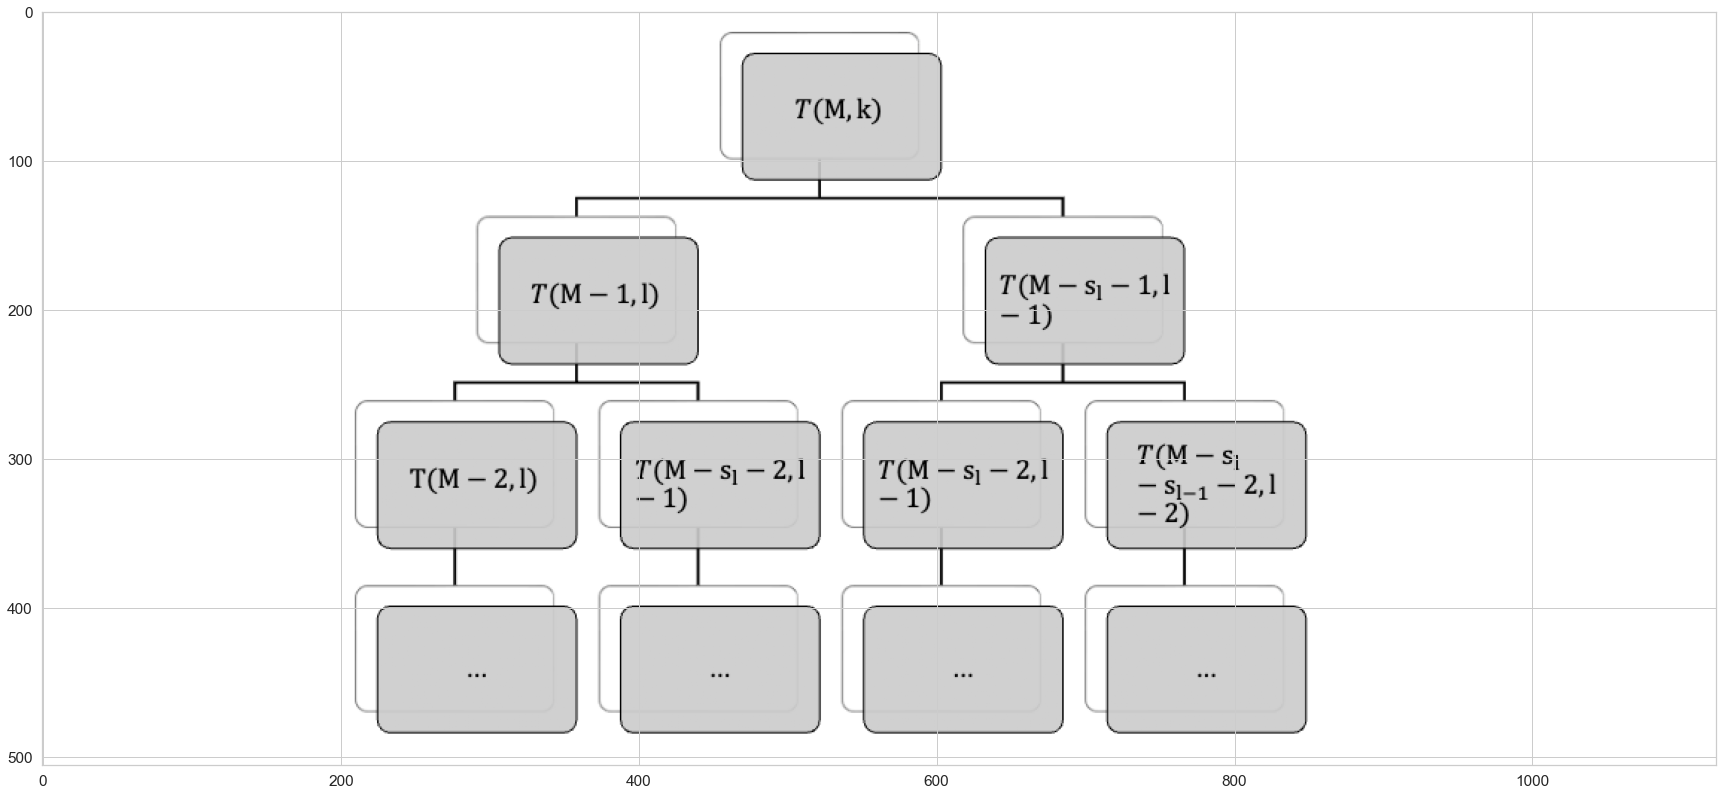

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl 
mpl.rcParams['figure.figsize'] = (30, 20)
img = mpimg.imread('img/T_j_l.png')
imgplot = plt.imshow(img)
plt.show()

##### Démonstration
À la base, si $j<s_l-1$, $T(j,l)$ retourne $Faux$, vu l'insuffisance de cases à colorier. Le corps de la fonction est composé d'instructions élémentaires en $O(1)$. 

En observant l'algorithme $T(j,l)$ construit ci-dessus, on remarque que dans le pire des cas, $T(j,l)$ fait l'appel à $T(j-1,l)$ et $T(j-s_l-1,l-1)$. La hauteur de chaque branche de l'arbre des appels récursifs dépend des paramètres $j$ et $l$ pris en entrée, qui sont marginalisés par la taille de chaque ligne de la matrice, dont $M$. 

Vu le structure de l'arbre des appels récursifs, on peut conclure que la vitesse de convergence de $T(j,l)$ est en $O(2^M)$. 

# 1.3 Propagation
### Temps d'exécution des instances $0-10.txt$
|Fichier|Temps de résolution|Fichier|Temps de résolution|
|-|-|-|-|
|0.txt|0.2s|6.txt|3.7s|
|1.txt|0.1s|7.txt|1.2s|
|2.txt|0.8s|8.txt|2.1s|
|3.txt|8.5s|9.txt|~70 minutes|
|4.txt|1.3s|10.txt|~78.32 minutes|
|5.txt|0.7s|-|-|

#### Principe de Coloration
> **NB** : Fonction fournie et rédigée comme indiquée dans l'Annexe - Algorithme 1

Au début de la fonction, on duplique la matrice $A$ fournie à l'entrée, on appelle la nouvelle matrice $A'$ afin d'éviter la confusion avec celle de départ. Les lignes et colonnes sont stockées dans les listes $LignesAVoir$ et $ColonnesAVoir$ avant d'entrer le boucle `while`. 

Dans la boucle `while`, on procède étape par étape : on colorie d'abord tous les lignes issues de la liste $LignesAVoir$, avant de procéder à la coloration des colonnes appartenant à la liste $ColonnesAVoir$. Après avoir colorié chaque ligne/colonne, on stocke dans la liste $New$ les indices des nouvelles cases coloriées de ce ligne/colonne, et met à jour respectivement les listes $ColonnesAVoir$ et $LignesAVoir$ en ajoutant les colonnes/lignes correspondant à l'indice ajouté dans $New$. Cependant, si l'impossibilité de coloration est détectée, on retourne immédiatement le tuple $(Faux, V)$, avec $V$ la matrice vide de taille $N\times M$.

Ensuite, on procède l'induction jusqu'à ce que les deux listes $LignesAVoir$ et $ColonnesAVoir$ soient toutes vides. 

Pourtant, à la fin du boucle `while`, malgré les conditions du boucle, il reste possible que la matrice ne soit pas toute coloriée vu l'existence des cases impossibles à prédire leurs couleurs correspondantes. C'est pour cette raison que l'on l'appelle la méthode de résolution incomplète. 

Donc, si toutes les cases de $A'$ sont coloriées, on retourne le tuple $(Vrai, A')$. Sinon, on retourne $(-1, A')$, dont $-1$ indique que l'on ne peut pas conclure la coloration de cette matrice.

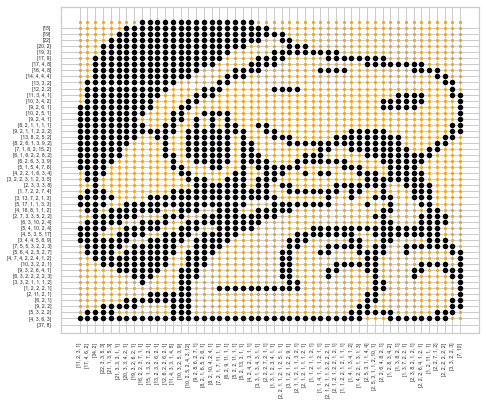

In [7]:
# FICHIER No.9
list_line, list_col = src.read_file("instances/9.txt")
A = [[-1]*(len(list_col))]*(len(list_line))
src.show(A, list_line, list_col, width=15, length=12, textsize0=5, textsize1=20, labelsize=5)
# Hint : c'est Snoopy

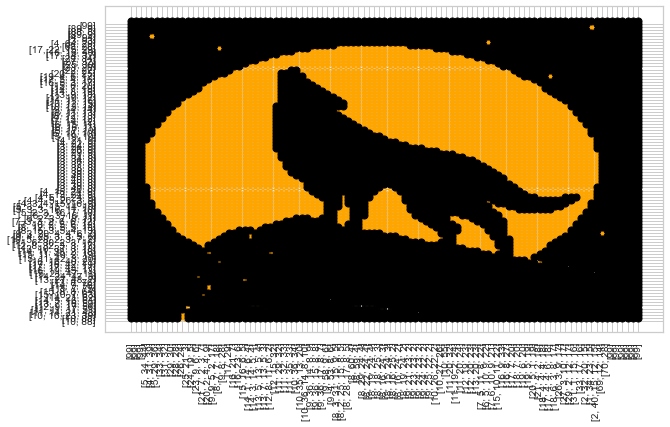

In [8]:
# FICHIER No.10
list_line, list_col = src.read_file("instances/10.txt")
A = [[-1]*(len(list_col))]*(len(list_line))
src.show(A, list_line, list_col)
# Hint : c'est un loup

---

Après avoir appliqué ce programme sur les instances, on remarque ce programme nous permet de bien tout colorier les instances de $1.txt$ à $10.txt$. 

Pourtant, en appliquant ce programme sur l'instance $11.txt$, le programme déclare donc l'impossibilité de colorier suivant les séquences associés à des lignes et colonnes du matrice. On remarque que en appliquant aux conditions de coloration du niveau plus élevé, qui nécessite profondément plusieurs tests d'hypothèses, la méthode de résolution incomplète ne semble pas la plus efficace. 

De même, en avancant du fichier $11.txt$ au $16.txt$, on trouve qu'une partie des matrices restent non colorée, tandis que les conditions de la boucle `while` de la fonction de propagation ont tous les deux déclarées vides. 

>**Note** : L'impossibilité de coloration de $11.txt$ peut être observée ci-dessous.

---

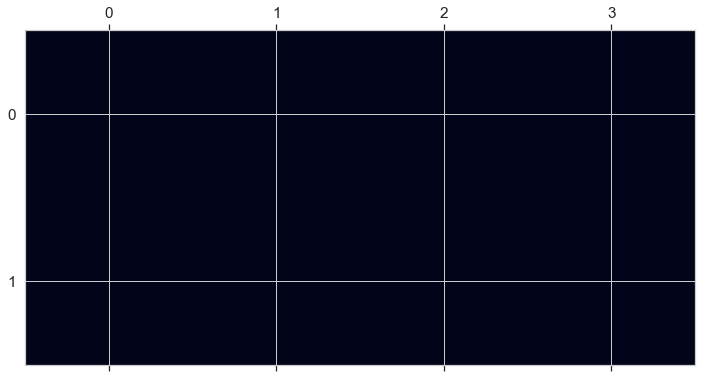

In [9]:
# WARNING : MATRICE NON COLORIÉ
# FICHIER No.11
list_line, list_col = src.read_file("instances/11.txt")
A = [[-1]*(len(list_col))]*(len(list_line))
_, A = src.COLORATION(A, list_line, list_col)
src.nonogramStyle(A)

## 2 Méthode complète de résolution
### Principe d'Énumération

#### Énumération Récursive
Vu l'impossibilité de coloration de l'algorithme définie dans la première partie, on construit donc sa version améliorée. 

Dans cette version, on prend en compte une matrice $A$ partiellement coloriée, et fait l'hypothèse concernant la couleur appropriée d'un nombre fini de cases non coloriées. Prenant $k$ le numéro de la case vide, on peut facilement calculer son emplacement $(i,j)$ en admettant $i=\lfloor\frac{k}{m}\rfloor$ et $j=k \mod m$, donc $m=M$, la longueur de chaque ligne de la matrice en étude. 

Ensuite, on effectue l'hypothèse de coloration en complétant la case $(i,j)$ par la couleur $c$ prise en entrée. 
- Si cet hypothèse est jugée comme $Faux$, on détecte l'impossibilité de coloration, et retourne immédiatement $(Faux, V)$, dont $V$ la matrice vide de taille $N\times M$ et rejete cet hypothèse.
- Si le jury de coloration vaut $Vrai$, on a tout colorer la matrice $A$, on retourne donc le tuple $(Vrai, A)$.
- En revanche, si les tests ont bien passés mais il existe encore de cases vides dans $A$, on procède l'induction en posant deux hypothèses, soient : 
  - $H_0$ : blanc vaut la bonne couleur
  - $H_1$ : noir vaut la bonne couleur

#### Énumération Complète
Cette partie est de base la fusion de la coloration automnatique et de l'énumération des hypothèses. On procède d'abord la coloration de la matrice $A$ de taille $N\times M$. 
- S'il est impossible de colorier *(ce qui signifie que l'information de blocs n'est pas compatible avec la dimension de $A$)*, on retourne le tuple $(Faux, V)$, dont $V$ la matrice vide de même taille que $A$. 
- Si elle est possible de partiellement ou complètement coloriée, on énumère l'hypothèse $H_0$ et $H_1$ comme les étapes précédents, en commencant depuis la première case de la matrice. 

### Temps d'exécution des instances $0-16.txt$
|Fichier|Temps de résolution|Fichier|Temps de résolution|
|-|-|-|-|
|0.txt|0.2s|9.txt|~70 minutes|
|1.txt|0.1s|10.txt|~78.32 minutes|
|2.txt|0.8s|11.txt|0.1s|
|3.txt|8.5s|12.txt|1.7s|
|4.txt|1.3s|13.txt|17.3s|
|5.txt|0.7s|14.txt|7.5s|
|6.txt|3.7s|15.txt|8.7s|
|7.txt|1.2s|16.txt|N/A|
|8.txt|2.1s|-|-|

### Analyse de complexité

La complexité de l'algorithme d'énumération peut être assez complexe à évaluer en raison de sa nature récursive et de la propagation dans la matrice à chaque étape.

La fonction `Enumeration` appelle d'abord la fonction `COLORATION`, qui elle-même fait des appels récursifs à la fonction `ColoreLigne` et `ColoreColonne`. La complexité de cette partie dépend de la manière dont les lignes et les colonnes sont colorées.

Ensuite, la fonction `Enumeration` appelle deux fois la fonction `Enum_Rec`, chacune avec deux appels récursifs. Chaque appel récursif appelle la fonction `Propagation`, qui effectue des opérations sur les lignes et les colonnes pour propager les couleurs.

La fonction `Enum_Rec` elle-même est récursive et effectue une propagation des couleurs pour chaque case de la matrice.

En général, avec toutes ces récursions, boucles imbriquées et propagations de couleurs, la complexité de cet algorithme d'énumération devient exponentielle en fonction de la taille de la matrice ($N \times M$) et de la complexité de coloration des lignes et des colonnes.

En conclusion, cet algorithme est de complexité exponentielle en $N$ et $M$ *(cqdm)*.

### Implantation et tests
Grâce à la méthode de résolution complète, on peut parfaitement colorier l'instance $11.txt$. L'affichage peut observé ci-dessous.

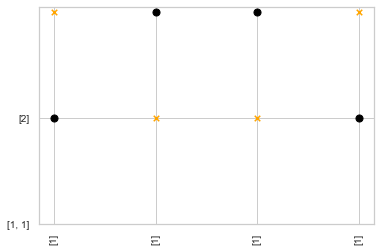

In [3]:
# FICHIER No.11
list_line, list_col = src.read_file("instances/11.txt")
A = [[-1]*(len(list_col))]*(len(list_line))
src.show(A, list_line, list_col)

#### Instance du $15.txt$
##### Version Coloration

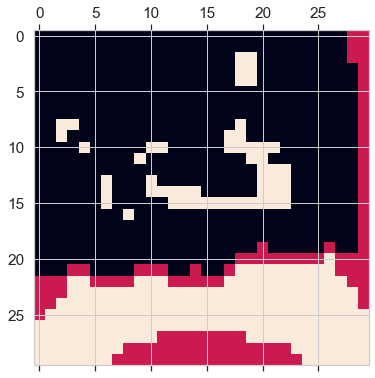

In [10]:
# FICHIER No.15
list_line, list_col = src.read_file("instances/15.txt")
A = [[-1]*(len(list_col))]*(len(list_line))
_, A = src.COLORATION(A, list_line, list_col)
#_, A = src.Enumeration(A, list_line, list_col)
src.nonogramStyle(A)
# Hint : c'est un PANDA

##### Version Coloration et Énumération

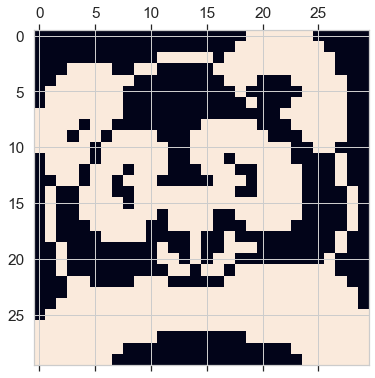

In [11]:
# FICHIER No.15
list_line, list_col = src.read_file("instances/15.txt")
A = [[-1]*(len(list_col))]*(len(list_line))
#_, A = src.COLORATION(A, list_line, list_col)
_, A = src.Enumeration(A, list_line, list_col)
src.nonogramStyle(A)
# Hint : c'est un PANDA

Comme montré les deux présentations de $15.txt$ ci-dessus, l'un pour la version Coloration **sans Énumération** et et l'autre **avec Énumération**, on remarque que la méthode de résolution incomplète n'est donc pas suffisant pour fournir une bonne coloration du Nonogram. Il reste encore beaucoup de cases vides, qui sont représentatées par les zones rouges dans le premier affichage.

En appliquant la méthode de résolution complète à l'instance $15.txt$, il nous permet de bien colorier et vérifier la conformité de l'ensemble des cases de la matrice. On obtient donc l'image parfait d'un Panda, donc le résultat finale de Coloration et d'Énumération appliquées à l'instance $16.txt$

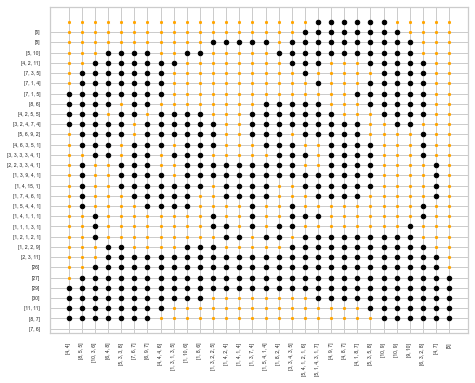

In [12]:
# FICHIER No.15
list_line, list_col = src.read_file("instances/15.txt")
A = [[-1]*(len(list_col))]*(len(list_line))
src.show(A, list_line, list_col, width=15, length=12, textsize0=5, textsize1=20, labelsize=5)
# Hint : c'est un PANDA

### Merci :)

---